## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##**Importing Libraries**

In [ ]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

#hide warnigs
import warnings  
warnings.filterwarnings(action='ignore')

##**Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading CSV file
airbnb_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Airbnb_Bookings_Analysis_Rajesh_Kumar_Patel-Capstone_Project_1/Airbnb NYC 2019.csv')

##**Data Exploration**

In [ ]:
#how many rows and columns
airbnb_data.shape

(48895, 16)

48895 numbers of row and 16 columns present in our data

In [ ]:
#summary of data
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#information about the data
airbnb_data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
#checking data types
airbnb_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Variable types

in our dataset have 10 Numeric feature and 6 Categorical feature

###**Feature information in details**

*  **id**  unique for every observation
* **name** name of properties
* **host_id** id for host
* **host_name** name of host
* **neighbourhood_group** it contains 5 Area ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
* **neighbourhood** it contains 221 locality names
* **latitude** it stores latitude
* **longitude** it stores longitude
* **room_type** it contains 3 unique room type ['Private room', 'Entire home/apt', 'Shared room']
* **price**  per night for rental property
* **minimum_nights** you have to book how many days
* **number_of_reviews** numbers of review in particular room
* **last_review** last_review date
* **reviews_per_month**  numbers of review per month
* **calculated_host_listings_count** Total number of listings owned by the host
* **availability_365** The number of days for which a particular host is available in a year




In [ ]:
# drop id column it's same as index column
airbnb_data.drop('id',axis=1,inplace=True)

In [ ]:
#checking duplicate rows
airbnb_data.duplicated().sum()

0

in our data set don't have duplicate rows

In [ ]:
#checking Null value
airbnb_data.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 4 columns that have null values, have to replace them as it might affect later while considering remaining values of the same column.

In [ ]:
#filling null values of 4 columns with respective values
airbnb_data.fillna({'name':"NoName"}, inplace=True)
airbnb_data.fillna({'host_name':"NoName"}, inplace=True)
airbnb_data.fillna({'last_review':"NotReviewed"}, inplace=True)
airbnb_data.fillna({'reviews_per_month':0}, inplace=True)

In [ ]:
#checking Null values (after replacing Null value to respective values)
airbnb_data.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##We have successfully treated the null values and now the data is cleaned so, we can explore some data analysis.

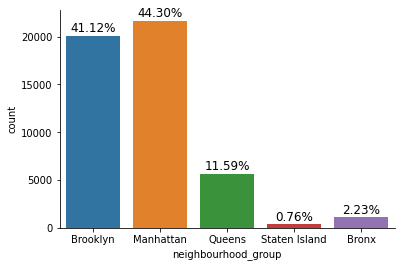

In [ ]:
#percentage share of property area-wise
# in this plot using Warnings
def show_percentage(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) #calculate percentage
        x = p.get_x() + p.get_width() / 2                         #x axis position
        y = p.get_y() + p.get_height() + 400                      #y axis position
        ax.annotate(percentage, (x, y), size = 12,ha="center")    
    sns.despine()                                                 #remove border                                               
    plt.show()

ax = sns.countplot('neighbourhood_group', data=airbnb_data)
show_percentage(ax, airbnb_data.neighbourhood_group)

Manhattan and Brooklyn have the highest percentage share of property


There are 5 groups & 85% is covered by Manhattan & Brooklyn

## Univariate Analysis

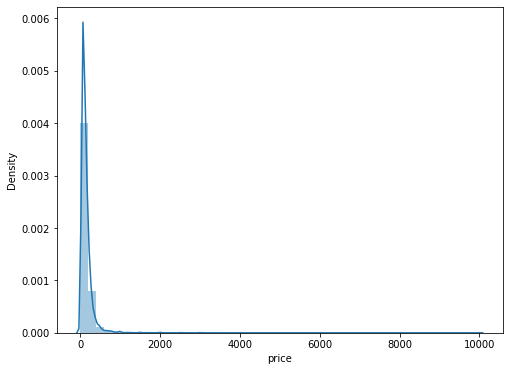

In [ ]:
#plot price
plt.figure(figsize=(8,6))
sns.distplot(airbnb_data['price'],kde=True)
plt.show()

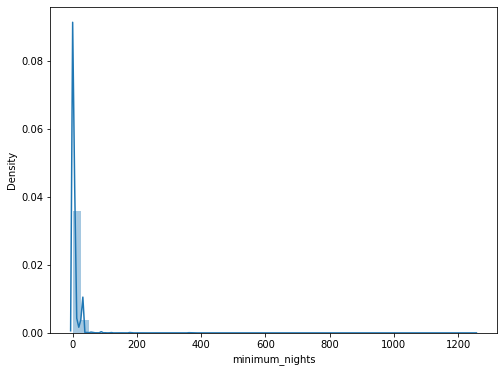

In [ ]:
#plot minimum nights
plt.figure(figsize=(8,6))
sns.distplot(airbnb_data['minimum_nights'],kde=True)
plt.show()

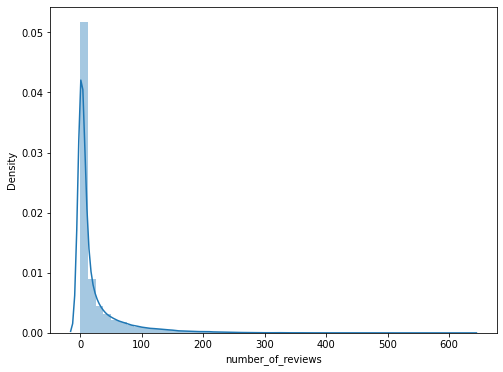

In [ ]:
#plot numbers of reviews 
plt.figure(figsize=(8,6))
sns.distplot(airbnb_data['number_of_reviews'],kde=True)
plt.show()

*  **From above plots all have these Characteristics**
* Deviate from the normal distribution
* It has a positive skewness
* High peakedness

In [ ]:
#statistical information about price
airbnb_data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
airbnb_data.price[airbnb_data.price <= 0].count()

11

price shoudn't be zero or less than zero , in our data set 11 data points have zero  

let's drop all zero price in dataset

In [ ]:
# drop all zero price in dataset
airbnb_data.drop(airbnb_data.price[airbnb_data.price <= 0].index, axis=0, inplace=True)

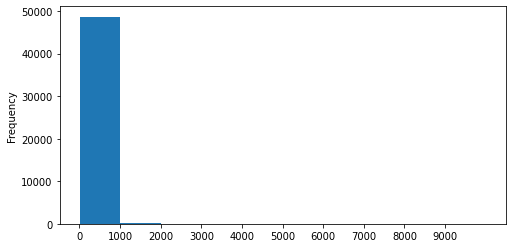

In [ ]:
#plot price
plt.figure(figsize=(8,4))
airbnb_data['price'].plot(kind='hist')
plt.xticks(np.arange(0, 10000, 1000)) #x axis intervals
plt.show()

Most of prices are less than 1000

In [ ]:
# how many data points (price greater than 1000)
airbnb_data.price[airbnb_data.price > 1000].count()

239

* In dataset, there are 239 data-points with  price greater than 1000
* we can treat them as outliers and drop them.

In [ ]:
# drop datapoints that have greater than 1000 price in dataset
airbnb_data.drop(airbnb_data.price[airbnb_data.price > 1000].index, axis=0, inplace=True)

##Bivariate Analysis or Relationship of Numerical Features

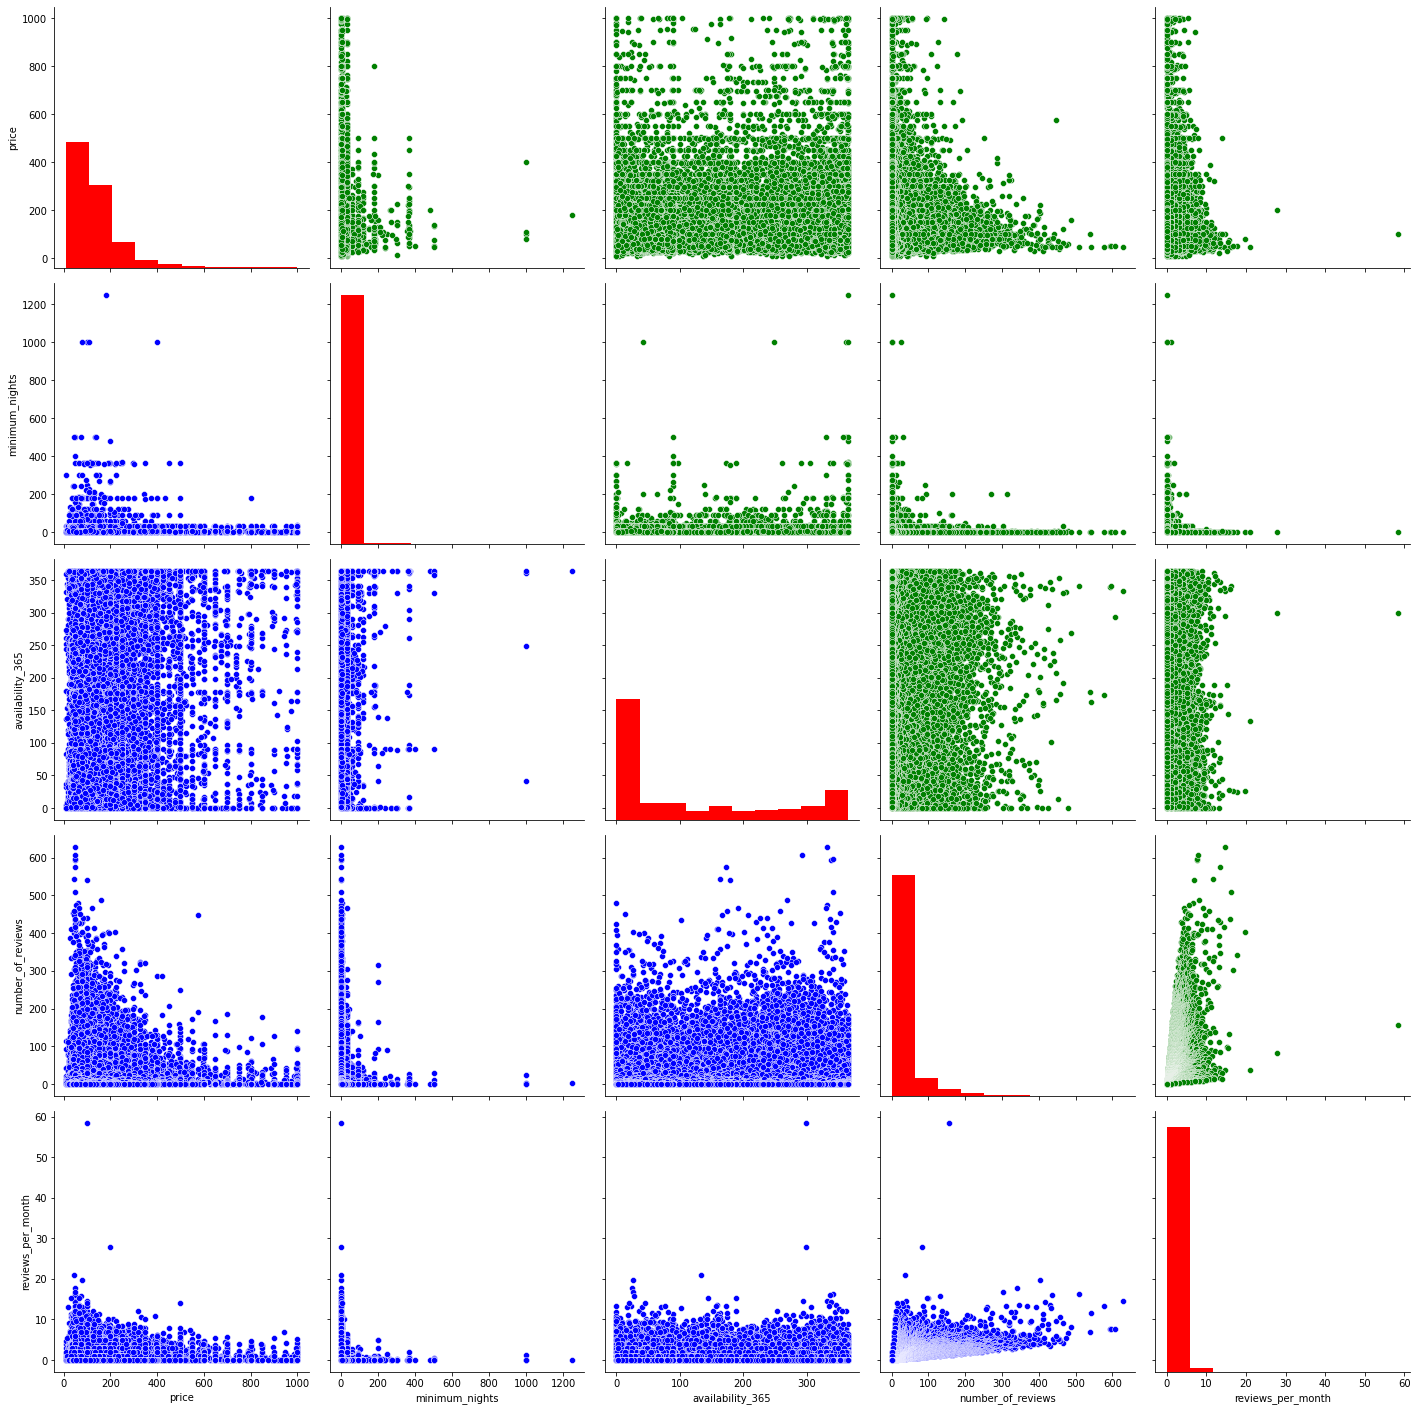

In [ ]:
# pair plot (price,minimum_nights,availability_365,number_of_reviews,reviews_per_month)
g = sns.PairGrid(airbnb_data,vars=['price','minimum_nights','availability_365','number_of_reviews','reviews_per_month'],size=4)
g.map_upper(sns.scatterplot, color='green')
g.map_lower(sns.scatterplot, color='blue')
g.map_diag(plt.hist, color='red')
plt.show()

##Relationship of Categorical Features

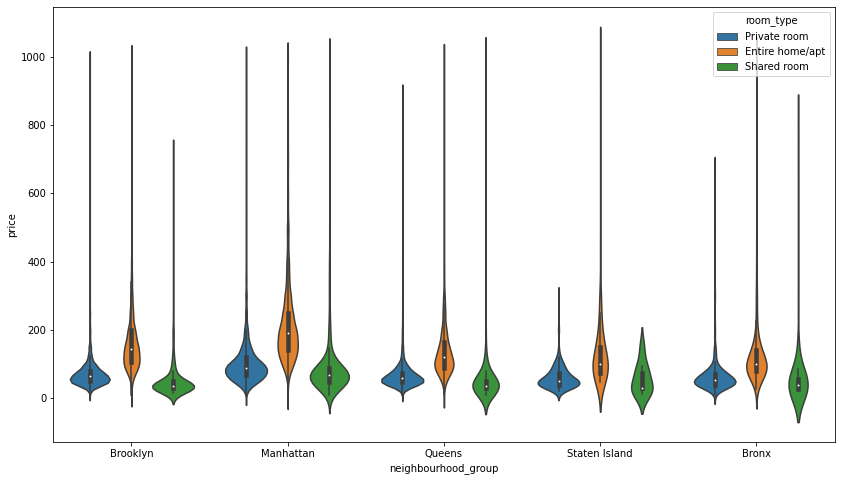

In [ ]:
#violin plot among neighbourhood_group and price by room_type
plt.figure(figsize=(14,8))
sns.violinplot(x='neighbourhood_group',y='price',hue='room_type', data =airbnb_data)
plt.show()

## Correlation plot

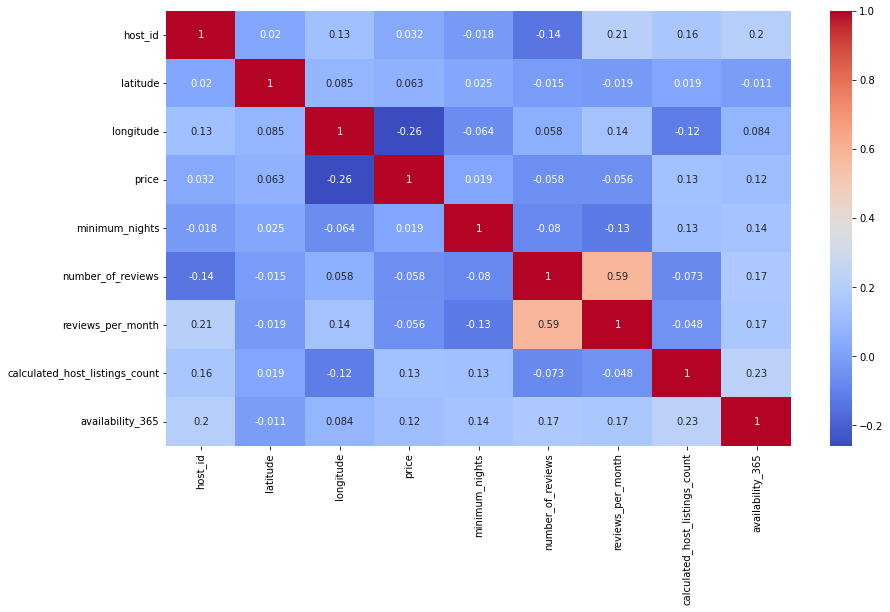

In [ ]:
#corelation plot
plt.figure(figsize=(14,8))
sns.heatmap(airbnb_data.corr(),annot=True,cmap='coolwarm')
plt.show()

* **Top 3 correlation columns**

1. The __number_of_reviews__ and __reviews per_month__ columns has highest correlation of values is __.59__
2. The __calculated_host_listings_count__ and __availability_365__ columns second highest correlation of values is __.23__
3. The __reviews_per_month__ and __availability_365__ columns second highest correlation of values is __.17__<br>
__Note__:Ignoring Latitude and Longitude Columns because they are Geographical Datas.

## Exploratory Data Analysis

### Which hosts are the busiest and why?

In [ ]:
#visualise top 10 busiest host
host_busiest_df=airbnb_data[['host_id','host_name']].value_counts().reset_index().head(10)
host_busiest_df.rename(columns={0:'Count'},inplace=True)
host_busiest_df['host_id']=host_busiest_df['host_id'].astype('string').apply(lambda x:x+"_")
fig = px.bar(host_busiest_df, y='Count', x='host_id', text='Count',color='host_name',opacity=.8)
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='property has been Booked for more number of times',yaxis=dict(showgrid=False,showticklabels=True),autosize=False,width=1000,height=500)
fig.show()

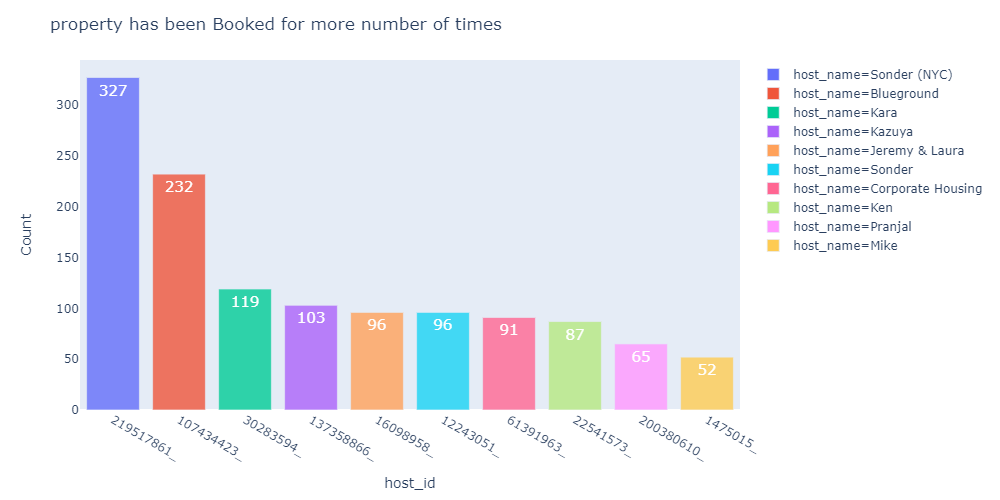

* **As we can see from above plot the Sonder(NYC) is busiest host
 Because his rental place has been Booked for more number of times**

## ___Custom Analysis___

1. **Which Area has more number of bookings?**

In [ ]:
# counts number of bookings
airbnb_data['neighbourhood_group'].value_counts()

Manhattan        21488
Brooklyn         20041
Queens            5656
Bronx             1089
Staten Island      371
Name: neighbourhood_group, dtype: int64

* Manhattan has more number of bookings

2. **I'm choosen Queens Neigborhood to live there for 20 days.Whether it will be cheaper to stay there compare to other neighborhoods.**


In [ ]:
#visualise property according to the price
df_new=airbnb_data.loc[airbnb_data['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens'])]
fig = px.bar(x='neighbourhood_group',y='price',data_frame=df_new.groupby(['neighbourhood_group']).mean().reset_index(),text='neighbourhood_group',
             color='neighbourhood_group',opacity=.8)
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='neigborhood based on the room prices',yaxis=dict(showgrid=False,showticklabels=True),autosize=False,width=800,height=500)
fig.show()

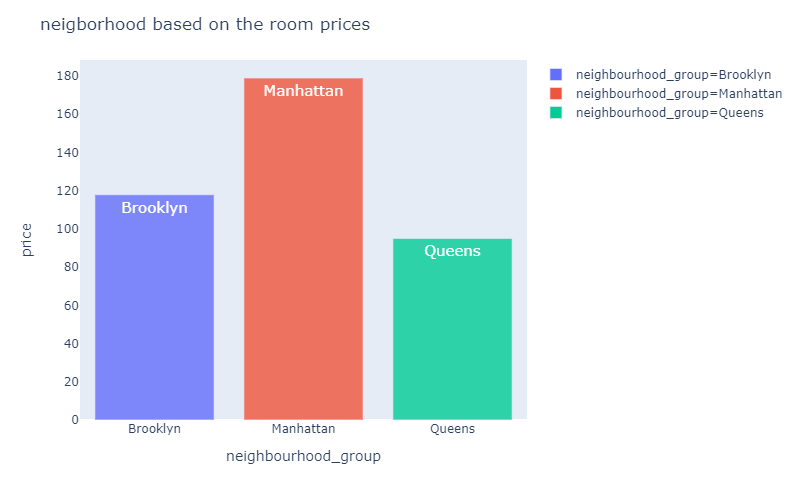

* Yes,The Queen neighborhood is cheaper to stay compare to other neigborhood based on the room prices.

3. **If Queens Neigborhood is cheaper,Then which room type can I prefer and area(neighborhood) best to visit  at Affordable cost. If not what is the alternative option to stay at other neighborhood group with room type and places at best cost.**

In [ ]:
queen_data=df_new.loc[df_new.neighbourhood_group=='Queens']

fig = px.bar(x='neighbourhood',y='price',data_frame=queen_data.groupby(['neighbourhood','room_type']).mean().reset_index(),color='room_type',barmode='group',opacity=.7)
fig.update_layout(title='Queens Room type and its places to visit at affordable Cost',yaxis_title='Average_Price_Per_Night',yaxis=dict(showgrid=False,
        showticklabels=True),autosize=False,width=1500,height=700)
fig.show()

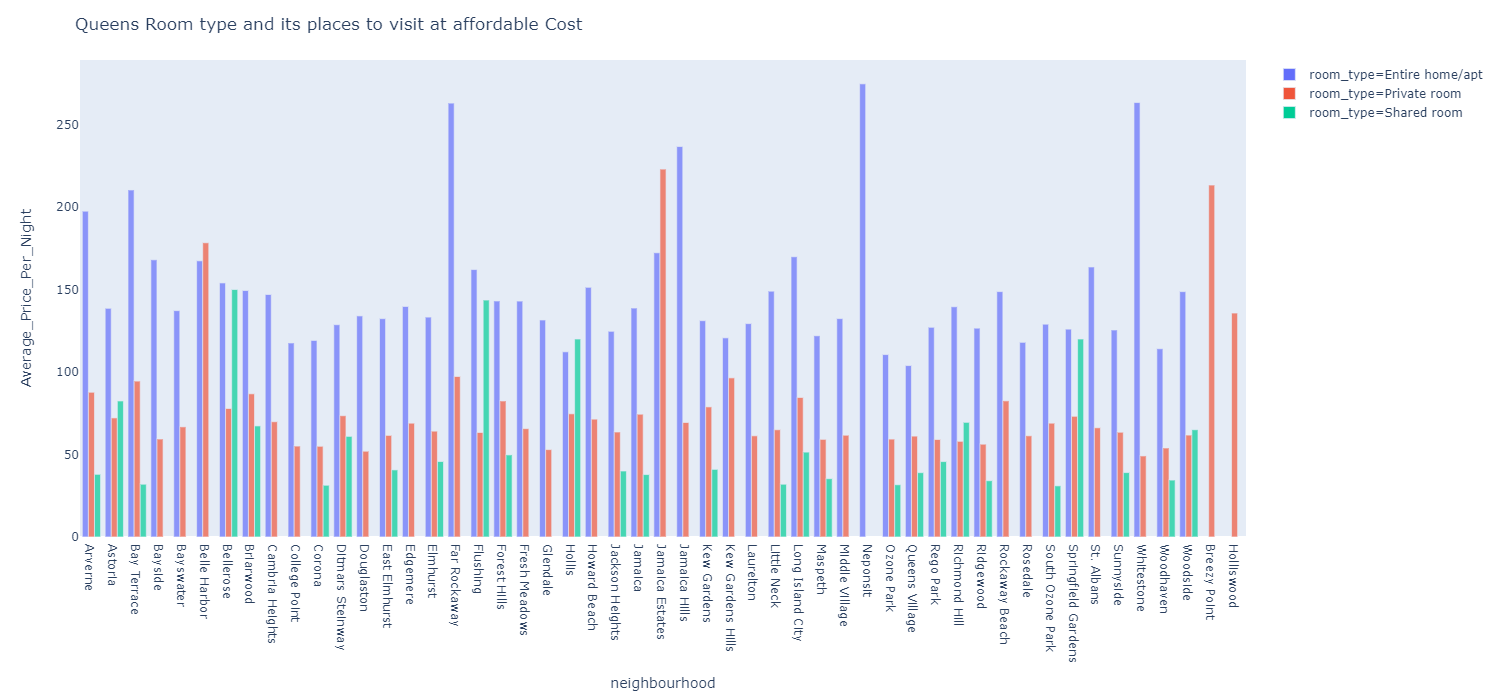

* The Nighborhood of South Ozone Park with Shared room type is best place to visit at affordable cost.Because we can see from graph the average price for that room type is 31$

4. **Once I stayed for  20 days.I had a balance amount of Rs.15000.Then I decided to stay other 10 days at Staten Island.Is this amount is sufficient only for room expenses?**

In [ ]:
#subset of dataset acording to Staten Island
df_staten=airbnb_data.loc[airbnb_data['neighbourhood_group'].isin(['Staten Island'])]
price_=round(df_staten['price'].mean()*10,0)

In [ ]:
#calculate how much for 10 days
if price_<=15000:
    print(f'The average amount to stay Rooms in Staten Island for 10 days is {price_}. Your amount is more Sufficient to stay there.')
else:
    print("The amount exceeds your budget plan for room in Staten Island.")

The average amount to stay Rooms in Staten Island for 10 days is 986.0. Your amount is more Sufficient to stay there.


5. **If yes, Then which Room type is prefer to live luxury life at Staten Island.I don't know the best place to visit in Staten Island.You guys explore it and tell me the best place to visit.**


In [ ]:
# visualize Luxury Rooms in Staten Island and its Room type
import plotly.graph_objects as go
df_luxury=df_staten.groupby(['room_type'])['price'].mean().to_dict()

fig = go.Figure(data=[go.Pie(text=list(df_luxury.keys()),labels=list(df_luxury.keys()), values=list(df_luxury.values()))])
fig.update_traces(textfont=dict(size=15,color='white'))
fig.update_layout(title='Luxury Rooms in Staten Island and its Room type',yaxis=dict(showgrid=False),autosize=False,width=600,height=500)
fig.show()

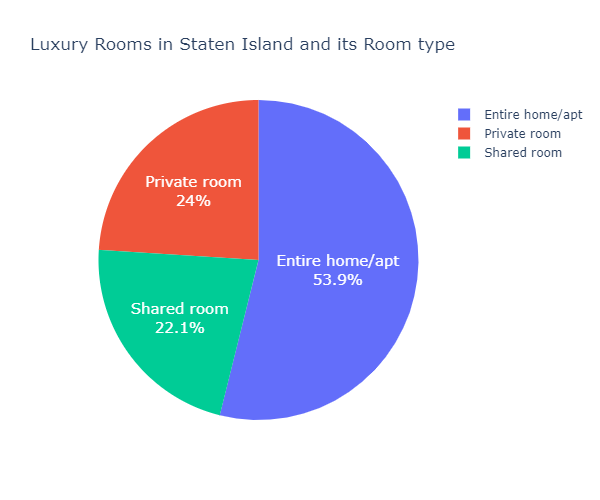

* The Entire home/apt room type is luxury compare to other room type.In here the average cost is 139.9 per night to stay in there.

In [ ]:
# plot Staten Island Neighborhood best places to Visit
fig = px.bar(x='neighbourhood',y='price',data_frame=df_staten.groupby(['neighbourhood']).count().reset_index(),labels={'y':'Count'},color='neighbourhood',opacity=.7,text='price')
fig.update_traces(textfont=dict(size=15,color='black'),textposition='outside')
fig.update_layout(title='Staten Island Neighborhood best places to Visit',yaxis_title='Count',yaxis=dict(showgrid=False,showticklabels=True),autosize=False,width=1400,height=600)
fig.show()

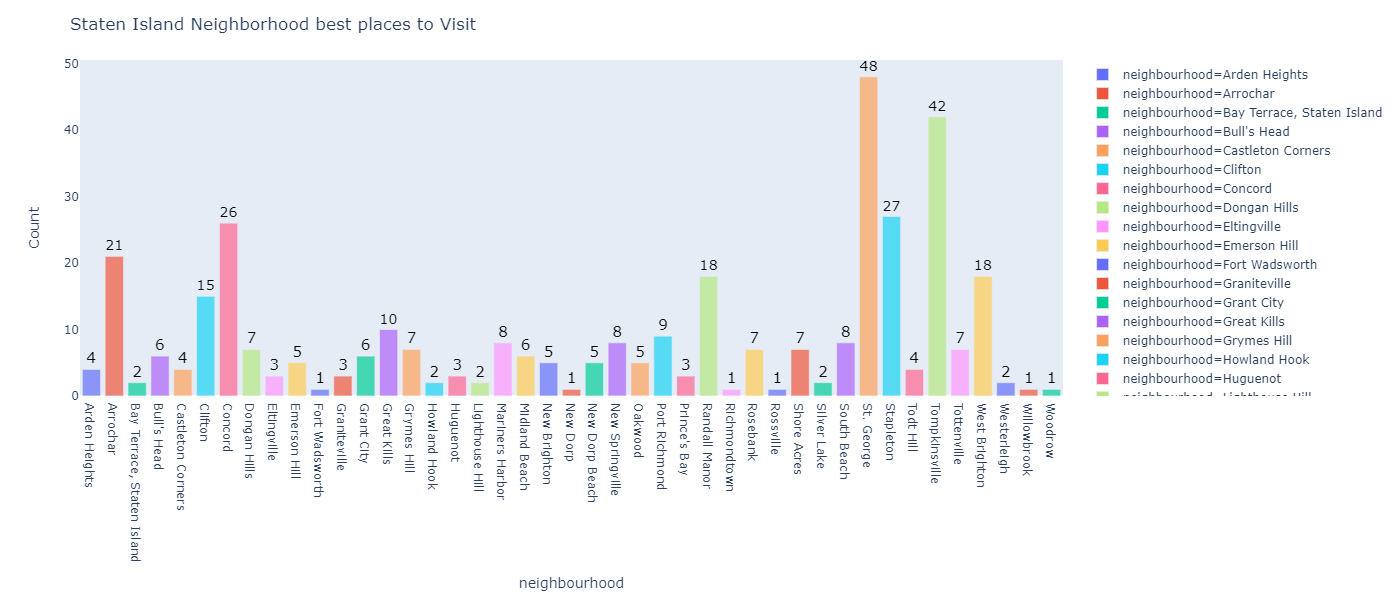

* The Room type of Entire home/apt is luxury to live in staten Island.The best place is to visit in Staten Island is St.George.

##Traffic among different areas and what could be the reason for it?

In [ ]:
#deciding map boundry
BoundaryBox = (airbnb_data.longitude.min(), airbnb_data.longitude.max(), airbnb_data.latitude.min(), airbnb_data.latitude.max())

In [ ]:
#loading map
ny_map = plt.imread('/content/drive/MyDrive/Colab Notebooks/Project/Airbnb_Bookings_Analysis_Rajesh_Kumar_Patel-Capstone_Project_1/airbnb_NY_map.PNG')

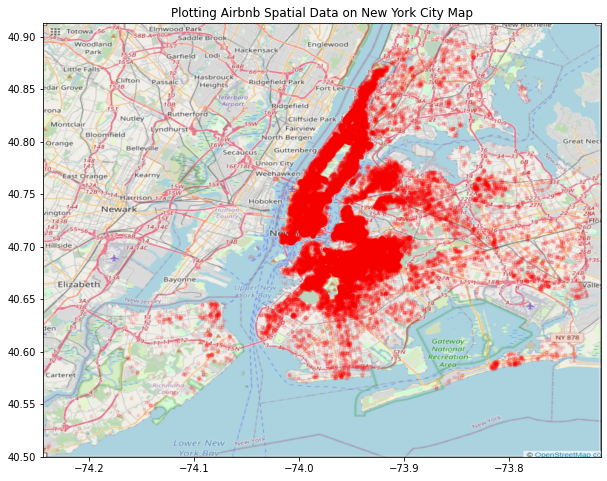

In [ ]:
#Plotting Airbnb Spatial Data on New York City Map
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(airbnb_data.longitude, airbnb_data.latitude, zorder=1, alpha= 0.1, c='red', s=10)
ax.set_title('Plotting Airbnb Spatial Data on New York City Map')
ax.set_xlim(BoundaryBox[0],BoundaryBox[1])
ax.set_ylim(BoundaryBox[2],BoundaryBox[3])
ax.imshow(ny_map, zorder=0, extent = BoundaryBox, aspect= 'equal')
plt.show()

In [ ]:
#subset dataset more expensive in descending order
airbnb_expensive100 = airbnb_data.sort_values('price',ascending=False, inplace=False).head(100)

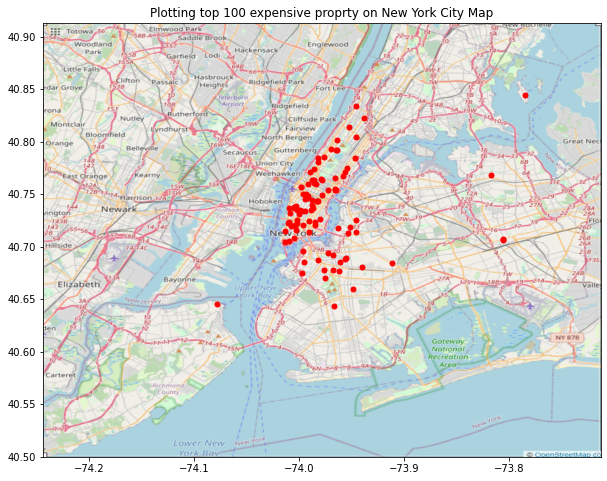

In [ ]:
#Plotting top 100 expensive proprty on New York City Map
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(airbnb_expensive100.longitude, airbnb_expensive100.latitude, zorder=1, alpha= 1, c='red', s=25)
ax.set_title('Plotting top 100 expensive proprty on New York City Map')
ax.set_xlim(BoundaryBox[0],BoundaryBox[1])
ax.set_ylim(BoundaryBox[2],BoundaryBox[3])
ax.imshow(ny_map, zorder=0, extent = BoundaryBox, aspect= 'equal')
plt.show()

* As we can see light red color dots with higher price and we can see manhatten region has more expensive room.

In [ ]:
#subset dataset more busiest area in descending order
airbnb_busiest100 = airbnb_data.sort_values('reviews_per_month',ascending=False, inplace=False).head(100)

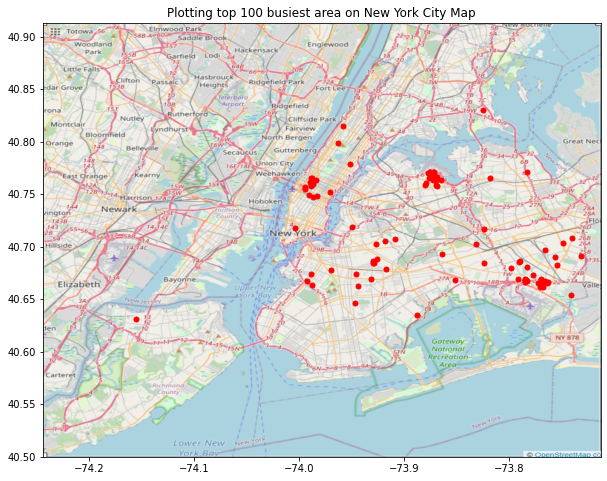

In [ ]:
#Plotting top 100 busiest area on New York City Map
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(airbnb_busiest100.longitude, airbnb_busiest100.latitude, zorder=1, alpha= 1, c='red', s=25)
ax.set_title('Plotting top 100 busiest area on New York City Map')
ax.set_xlim(BoundaryBox[0],BoundaryBox[1])
ax.set_ylim(BoundaryBox[2],BoundaryBox[3])
ax.imshow(ny_map, zorder=0, extent = BoundaryBox, aspect= 'equal')
plt.show()

*  **More busiest area are nearby airpot**